# MATH387 Lab Final
Kabilan Sriranjan

22/04/18

In [140]:
import math
import numpy as np
import scipy.special as scp
import matplotlib.pyplot as plt

## Question 1.

We aim to find $k$ and $\alpha$ that maximizes the sum $k+\alpha$ while mainting the membership $f_a \in C^{k,\alpha}([-1,1])$. This is clearly equivalent to just finding the maximal $k$ and maximal $\alpha$ independantly.

First we find $k$. On the interval $(0,1]$ the $k^{th}$ derivative of $f_a$ is just $(\prod_{i=0}^{k}(a-i))x^{a-k}$. If we choose $k \geq a$ then the $k^{th}$ derivative on $(0,1]$ is either $a!$ or $cx^{-b}$ for some $b,c \in \mathbb{R}$ with $b > 0$. In either case $f_{a}^{(k)} \notin C^0([-1,1])$, as there is a discontinuity point at $x=0$. We need to choose $k$ as large as possible while still being less than $a$, so the best we can do is $k = \lceil a-1\rceil$. This works as the $k^{th}$ derivative in $(0,1]$ is of the form $f_a^{(k)} = cx^{a-\lceil a \rceil}$ for some $c \in \mathbb{R}$, which is indeed continuous.

Next we must find the maximal $\alpha$ such that the Holder continuity criterion holds. We need to find an upper bound in terms of $a$ of $\frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^{\alpha}}$, and we can obviously assume $y>0$. If we choose $\alpha > a$ we get that 

\begin{align*}
&\sup_{-1<x<y<1}\frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^{\alpha}} \\
= &\sup_{-1<x<y<1}\frac{|cx^{a - \lceil a-1 \rceil}-cy^{a - \lceil a-1 \rceil}|}{|x-y|^{\alpha}} \\
\geq &\sup_{-1/2<x<1/2} \frac{|cx^{a - \lceil a-1 \rceil}-c(2x)^{a - \lceil a-1 \rceil}|}{|x-2x|^{\alpha}} \\
= &\sup_{-1/2<x<1/2} cx^{a - \lceil a-1 \rceil}\frac{|1-2^{a - \lceil a-1 \rceil}|}{|x|^{\alpha}} \\
= &\sup_{-1/2<x<1/2} c\frac{|1-2^{a - \lceil a-1 \rceil}|}{|x|^b} \\
\geq &\infty
\end{align*}

So we cannot choose $\alpha > a - \lceil a-1 \rceil$. If $\alpha = a - \lceil a-1 \rceil$ we get

\begin{align*}
&\sup_{-1<x<y<1}\frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^{\alpha}} \\
= &\sup_{-1<x<y<1}\frac{|cx^{a - \lceil a-1 \rceil}-cy^{a - \lceil a-1 \rceil}|}{|x-y|^{a - \lceil a \rceil}} \\
\leq &\sup_{-1<x<y<1}\frac{c|x-y|^{a - \lceil a-1 \rceil}}{|x-y|^{a - \lceil a-1 \rceil}} \\
= &c
\end{align*}

Hence the largest $\alpha$ we can choose is $a - \lceil a-1 \rceil$.

The best choice of $k$ is $\lceil a-1 \rceil$ and the best choice of $\alpha$ is $a - \lceil a-1 \rceil$. Therefore the maximal $\alpha+k$ possible is $a$. 

## Question 2.
### Piecewise Constant Approximation

The first approximation of $f_a(x)$ we will use is by piecewise constants. We break the interval [-1,1] into n subintervals and sample $f_a$ at the midpoints to form the approximation.

In [ ]:
#Function we are approximating
def f(a, x):
    if x>0:
        return x**a
    return 0

#Get the maximum difference between two sets of function values
def maxNorm(xs, ys):
    return np.max(np.abs(np.array(xs)-np.array(ys)))

#Given a value of x find the midpoint of the subinterval it belongs to
def bucket(x, n):
    for k in range(1, n+1):
        if (-1+k*2/n) > x:
            return -1+(k*2-1)/n
    return 1-1/n

In [222]:
#Piecewise constant approximation comes from sampling f at the midpoint closest to x
def pwConst(n, a, x):
    return f(a, bucket(x,n))

#Compute piecewise constant approximations for a range of n values
def pwConstNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        dy = []
        for x in dx:
            dy.append(pwConst(n, a, x))
        data.append(dy)
    return data

#Estimate rate of convergence of piecewise constant approximation for a range of a values 
def pwConstTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(pwConstNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

### Approximation Plots

Below we see the plots of some piecewise constant approximations of $f_a$ for various $n$ and $a$. 

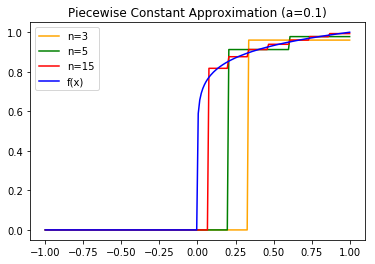

In [462]:
a = 0.1
data = pwConstNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Constant Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

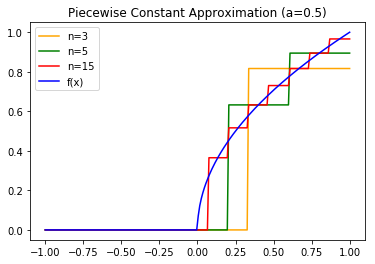

In [463]:
a = 0.5
data = pwConstNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Constant Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

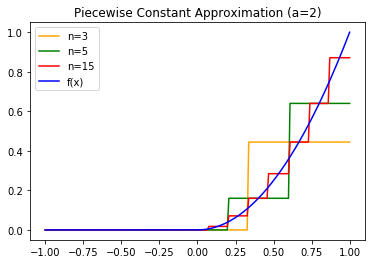

In [464]:
a = 2
data = pwConstNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Constant Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

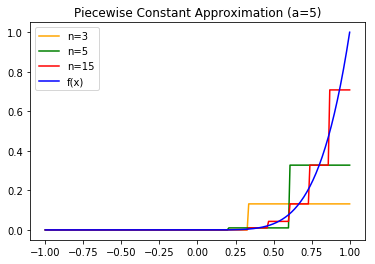

In [465]:
a = 5
data = pwConstNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Constant Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

### Error Function

Below we can see the rate of convergence for $f_{1}(x)$ as n increases. If we assume the dependance of the approximation error as $E \approx n^{-r}$ we can easily estimate the rate of convergence, $r$. This can be done by considering the logs of each quantity and finding the slope of the line of best fit.

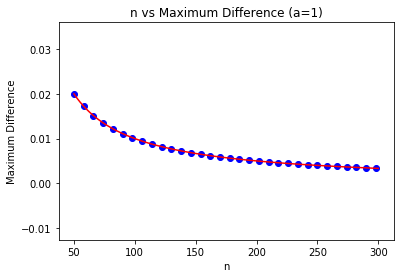

In [518]:
a = 1
ns = np.array(range(50,300,8))
data = np.array(pwConstNs(a, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(50,300,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.title("n vs Maximum Difference (a="+str(a)+")")
plt.xlabel("n")
plt.ylabel("Maximum Difference")
plt.show()

### Rate of Convergence

$f_a$ is irregular for values of $a$ close to $0$, but once $a$ is greater than $1$ it becomes differentiable. This regularity affects the rate of convergence, as seen in the plot below. There seem to be two different dependancies $r=r(a)$. For small values of $a$ the rate appears to grow logarithmically up until $a=1$, where the rate becomes roughly constant. 

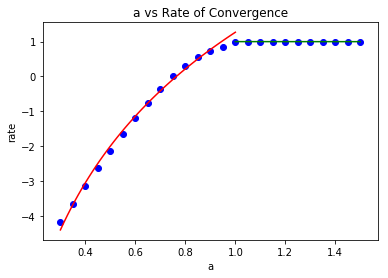

In [521]:
aList = np.linspace(0.3,1.5,25)
ns = np.array(range(200,300,4))
rList = pwConstTest(aList, ns)
aLeft = aList[:12]
rLeft = rList[:12]
aRight = aList[-8:]
rRight = rList[-8:]
fitL = np.polyfit(np.log(aLeft), rLeft, deg=1)
fitR = np.polyfit(aRight, rRight, deg=1)
left = np.linspace(0.3,1,50)
right = np.linspace(1,1.5,50)
plt.scatter(aList, rList, color="blue")
plt.plot(left, fitL[1]+fitL[0]*np.log(left), color="red")
plt.plot(right, fitR[1]+fitR[0]*right, color="green")
plt.title("a vs Rate of Convergence")
plt.xlabel("a")
plt.ylabel("rate")
plt.show()

## Question 3.

### Piecewise Linear Approximation

The next technique we will use will be piecewise linear approximation. For each interval we sample $f_a$ at each endpoint and approximate using the secant line.  

In [248]:
#Piecewise linear approximation uses the secant line of the endpoints of the interval x belongs to
def pwLin(n, a, x):
    x1 = bucket(x,n) - 1/n
    x2 = x1 + 2/n
    y1 = f(a, x1)
    y2 = f(a, x2)
    slope = (y2-y1)/(x2-x1)
    rise = slope*(x-x1)
    return y1+rise

#Compute piecewise linear approximations for a range of n values
def pwLinNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        dy = []
        for x in dx:
            dy.append(pwLin(n, a, x))
        data.append(dy)
    return data

#Estimate rate of convergence of piecewise linear approximation for a range of a values 
def pwLinTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(pwLinNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

### Approximation Plots

Below we see the plots of some piecewise linear approximations of $f_a$ for various $n$ and $a$. 

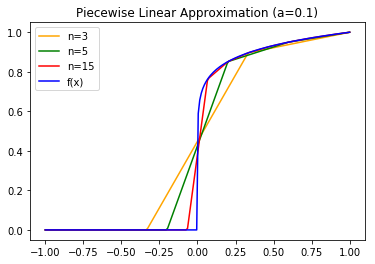

In [485]:
a = 0.1
data = pwLinNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Linear Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

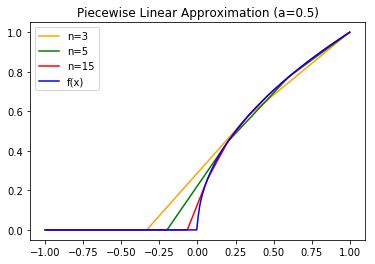

In [486]:
a = 0.5
data = pwLinNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Linear Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

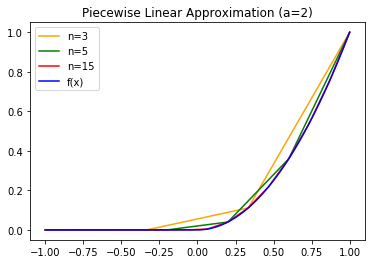

In [487]:
a = 2
data = pwLinNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Linear Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

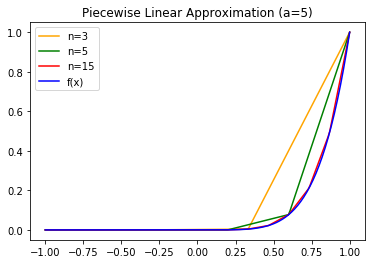

In [488]:
a = 5
data = pwLinNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Piecewise Linear Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

### Error Function

Below is the plot of the error of our approximation for $f_{0.5}$ for increasing n. We estimate the rate of convergence, $r$, as before. 

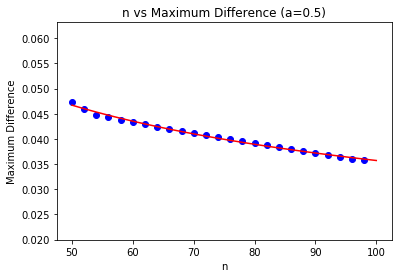

In [496]:
a = 0.5
ns = np.array(range(50,100,2))
data = np.array(pwLinNs(a, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(50,100,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.title("n vs Maximum Difference (a="+str(a)+")")
plt.xlabel("n")
plt.ylabel("Maximum Difference")
plt.show()

### Rate of Convergence

We can see that the rate of convergence using piecewise linear approximation is in general faster than piecewise constant, which makes sense. However for piecewise constant functions the threshold where the dependance of $r$ on $a$ changed was at $a=1$ but here it's at $a=2$. For $a<2$ I modeled the rate of convergence to grow with a logarithmic function and for $a>2$ it decreases linearly. When crossing the threshold of $a=2$ there is a steep drop which is what motivated the use of two different models. This change in behaviour is due to the fact that piecewise linear functions can perfectly approximate $f_1(x)$ which piecewise constants can only do $f_0(x)$ perfectly. 

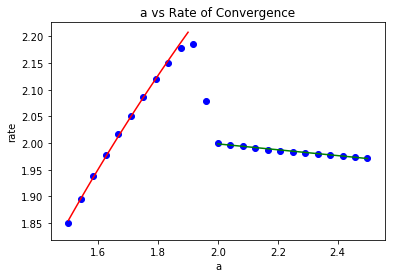

In [517]:
aList = np.linspace(1.5,2.5,25)
ns = np.array(range(50,100,2))
rList = pwLinTest(aList, ns)
aLeft = aList[:9]
rLeft = rList[:9]
aRight = aList[-13:]
rRight = rList[-13:]
fitL = np.polyfit(np.log(aLeft), rLeft, deg=1)
fitR = np.polyfit(aRight, rRight, deg=1)
left = np.linspace(1.5,1.9,50)
right = np.linspace(2,2.5,50)
plt.scatter(aList, rList, color="blue")
plt.plot(left, fitL[1]+fitL[0]*np.log(left), color="red")
plt.plot(right, fitR[1]+fitR[0]*right, color="green")
plt.title("a vs Rate of Convergence")
plt.xlabel("a")
plt.ylabel("rate")
plt.show()

## Question 4.

### Bernstein Polynomial Approximation

The next type of approximation we use is Bernstein approximation. Normal Bernstein basis functions, $b_{k,n}(x)$, are defined on the interval $[0,1]$ and use equally spaced control points of the form $k/n$. For our function we used the transformed basis functions $b_{k,n}(\frac{x+1}{2})$ so that we had approximation on the interval $[-1,1]$. Our controls points are given by $\frac{2k}{n} -1$.

In [343]:
#Evaluate the kth Bernstein basis function of degree n at x
def b(k, n, x):
    z = (x + 1)/2
    return scp.binom(n,k)*(z**k)*(1-z)**(n-k)

#Take the linear combination of basis function to approximate f_a
def B(n, a, x):
    total = 0
    for k in range(0, n+1):
        total = total + f(a, -1 + 2*k/n)*b(k, n, x)
    return total

#Compute Bernstein polynomial approximations for a range of n values
def bernNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        dy = []
        for x in dx:
            dy.append(B(n, a, x))
        data.append(dy)
    return data

#Estimate rate of convergence of Bernstein polynomial approximation for a range of a values 
def bernTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(bernNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

### Approximation Plots

Below we see the plots of some Bernstein polynomial approximations of $f_a$ for various $n$ and $a$. 

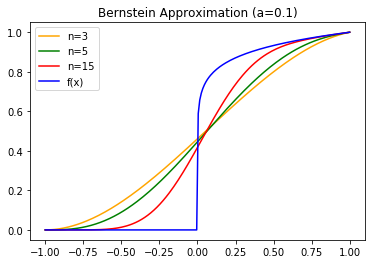

In [500]:
a = 0.1
data = bernNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Bernstein Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

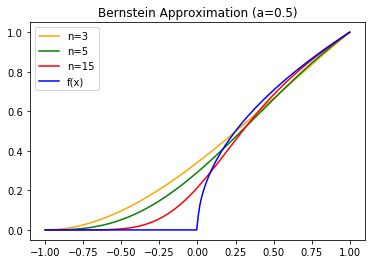

In [501]:
a = 0.5
data = bernNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Bernstein Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

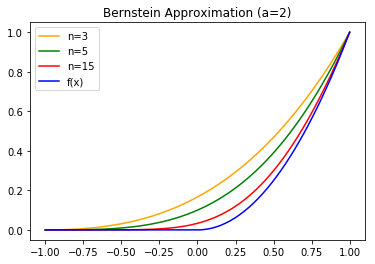

In [502]:
a = 2
data = bernNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Bernstein Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

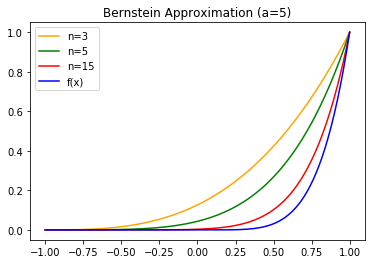

In [503]:
a = 5
data = bernNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Bernstein Approximation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

### Error Function

Below is the plot of the error of our approximation for $f_{0.5}$ for increasing n. We estimate the rate of convergence, $r$, as before. 

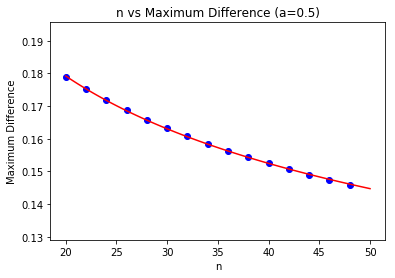

In [538]:
a = 0.5
ns = np.array(range(20,50,2))
data = np.array(bernNs(a, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(20,50,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.title("n vs Maximum Difference (a="+str(a)+")")
plt.xlabel("n")
plt.ylabel("Maximum Difference")
plt.show()

### Rate of Convergence

We use a logarithmic model to estimate the dependance $r$ on $a$. It's not perfect but fits the idea of how the rate at which Bernstein polynomials converge increases quickly for small $a$ and then slows down as $a$ increases. This is because of the irregularity of $f_a$ when $a$ is close to $0$, it's difficult for a polynomial to have such a steep slope at $x=0$. Unlike for piecewise linear approximation there is no sudden threshold where the rate of convergence drops.

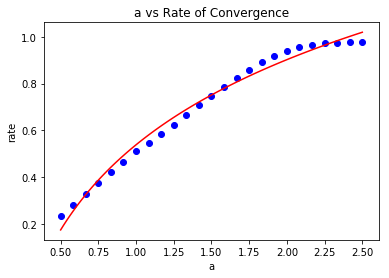

In [553]:
aList = np.linspace(0.5,2.5,25)
ns = np.array(range(20,50,2))
rList = bernTest(aList, ns)
aLeft = aList[:13]
rLeft = rList[:13]
aRight = aList[-7:]
rRight = rList[-7:]
fitL = np.polyfit(np.log(aLeft), rLeft, deg=1)
fitR = np.polyfit(aRight, rRight, deg=1)
left = np.linspace(0.5,1.9,50)
right = np.linspace(2.2,2.5,50)
fit = np.polyfit(np.log(aList), rList, deg=1)
dx = np.linspace(0.5,2.5,100)
plt.scatter(aList, rList, color="blue")
plt.plot(dx, fit[1]+fit[0]*np.log(dx), color="red")
plt.title("a vs Rate of Convergence")
plt.xlabel("a")
plt.ylabel("rate")
plt.show()

## Question 5.

### Chebyshev Interpolation

The last technique we explore is Chebyshev interpolation. We construct Chebyshev nodes for the interval $[-1,1] and then do a Lagrange interpolation.

In [445]:
#Get n Chebyshev nodes for the interval [-1,1]
def chebyNodes(n):
    k = np.array(range(1,n+1))
    return np.cos((2*k-1)*np.pi/(2*n))[::-1]

#Get the coefficients for a Lagrange interpolation polynomial with Chebyshev nodes
def interp(n, a):
    nodes = chebyNodes(n)
    V = np.vander(nodes)
    b = []
    for node in nodes:
        b.append(f(a, node))
    alpha = np.linalg.solve(V, b)
    return alpha

#Evaluate a polynomial at x using given coefficients
def evalPolynomial(alpha, x):
    total = 0
    x2 = 1
    for a in alpha[::-1]:
        total = total+a*x2
        x2 = x2*x
    return total

#Compute Chebyshev interpolations for a range of n values
def chebyNs(a, ns):
    data = []
    dx = np.linspace(-1,1,200)
    data.append(dx)
    y = []
    for x in dx:
        y.append(f(a, x))
    data.append(y)
    for n in ns:
        alpha = interp(n, a)
        dy = []
        for x in dx:
            dy.append(evalPolynomial(alpha, x))
        data.append(dy)
    return data

#Estimate rate of convergence of Chebyshev interpolations for a range of a values 
def chebyTest(aList, ns):
    rs = []
    for a in aList:
        data = np.array(chebyNs(a, ns))
        maxima = []
        for i in range(2, len(data)):
            maxima.append(maxNorm(data[1], data[i]))
        fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
        rs.append(-fit[0])
    return rs

### Approximation Plots

Below we see the plots of some Chebyshev interpolation of $f_a$ for various $n$ and $a$. 

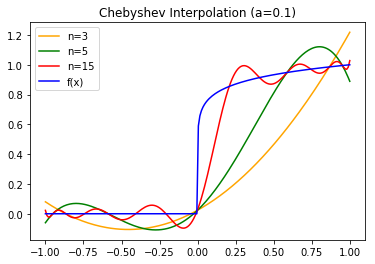

In [527]:
a = 0.1
data = chebyNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Chebyshev Interpolation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

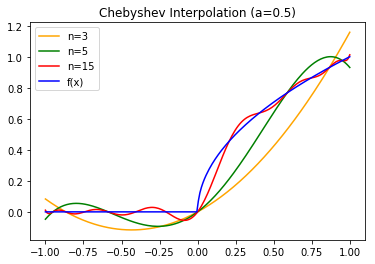

In [528]:
a = 0.5
data = chebyNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Chebyshev Interpolation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

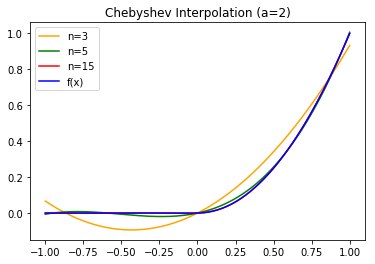

In [529]:
a = 2
data = chebyNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Chebyshev Interpolation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

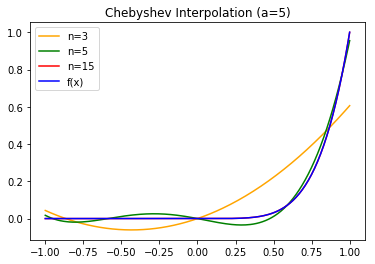

In [530]:
a = 5
data = chebyNs(a, [3,5,15])
plt.plot(data[0], data[2], color="orange", label="n=3")
plt.plot(data[0], data[3], color="green", label="n=5")
plt.plot(data[0], data[4], color="red", label="n=15")
plt.plot(data[0], data[1], color="blue", label="f(x)")
plt.title("Chebyshev Interpolation (a="+str(a)+")")
plt.legend(loc="best")
plt.show()

### Error Function

Below is the plot of the error of our approximation for $f_{2}$ for increasing n. We estimate the rate of convergence, $r$, as before. 

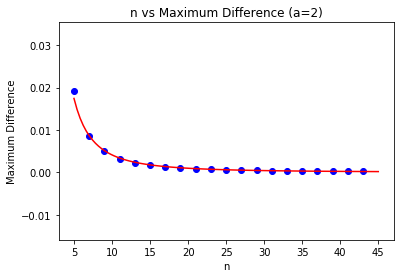

In [532]:
a = 2
ns = np.array(range(5,45,2))
data = np.array(chebyNs(a, ns))
maxima = []
for i in range(2, len(data)):
    maxima.append(maxNorm(data[1], data[i]))

fit = np.polyfit(np.log(ns),np.log(maxima), deg=1)
xs = np.linspace(5,45,100)
ys = np.exp(fit[1])*xs**fit[0]
plt.scatter(ns, maxima, color="blue")
plt.plot(xs, ys, color="red")
plt.title("n vs Maximum Difference (a="+str(a)+")")
plt.xlabel("n")
plt.ylabel("Maximum Difference")
plt.show()

### Rate of Convergence

The rate of convergence for Chebyshev interpolation appears to be linear with $a$, where the more irregular functions with $a$ close to $0$ have a slower rate. While, in general, Chebyshev polynomials can't approximate functions well near the endpoints, it appears that they can approximate $f_a$ very well. This is likely due to the fact that the derivative of $f_a$ does not get too large at the endpoints for the values of $a$ we are considering, which is when we expect interpolation polynomials to work best. 

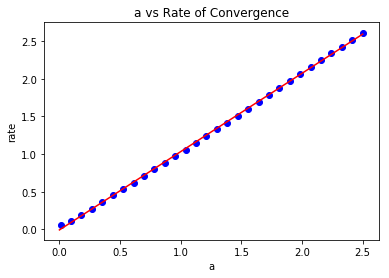

In [533]:
aList = np.linspace(0.01,2.5,30)
ns = np.array(range(5,45,2))
rList = chebyTest(aList, ns)
fit = np.polyfit(aList, rList, deg=1)
dx = np.linspace(0, 2.5, 100)
dy = fit[1]+fit[0]*dx
plt.scatter(aList, rList, color="blue")
plt.plot(dx, dy, color="red")
plt.title("a vs Rate of Convergence")
plt.xlabel("a")
plt.ylabel("rate")
plt.show()